### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2023 ###

# Establishing a college timetable #

#### Student 1 (email address), Student 2 (email address), Student 3 (email address)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

<!-- The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with [citations](https://en.wikipedia.org/wiki/Citation)) of how the problem came about, why it's important/interesting, and any other interesting facts you'd like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated?) Also give an outline of the rest of the report.

This section should be 300-600 words long, and **should be accessible to a general audience** (don't assume your reader has taken the class!). Feel free to include images if you think it'll be helpful:
![fixit flowchart][flow]

For more help on using Markdown, see [this reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg -->

Mr. Miller is in charge of establishing the weekly timetable for two classes of the last year in a college. The two classes have the same teachers, except for mathematics and sport. In the college all lessons have a duration of two hours. Furthermore, all students of the same class attend exactly the same courses. From Monday to Friday, the slots for courses are the following: 8:00–10:00, 10:15–12:15, 14:00–16:00, and 16:15–18:15. The following table lists the number of two-hour lessons that every teacher has to teach the students of the two classes per week. 

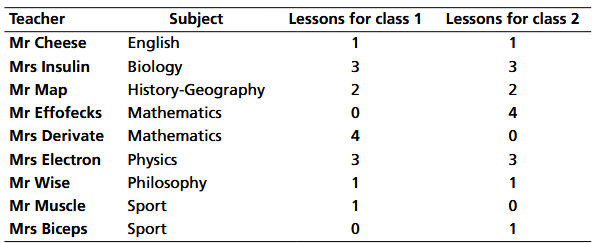



The sport lessons have to take place on Thursday afternoon from 14:00 to 16:00. Furthermore, the first time slot on Monday morning is reserved for supervised homework. Mr Effofecks is absent every Monday morning because he teaches some courses at another college. Mrs Insulin does not work on Wednesday. And finally, to prevent students from getting bored, every class may only have one two-hour lesson per subject on a single day. Write a mathematical program that allows Mr Miller to determine the weekly timetable for the two classes.

## 2. Mathematical model ##

<!-- A discussion of the modeling assumptions made in the problem (e.g. is it from physics? economics? something else?). Explain the decision variables, the constraints, and the objective function. Finally, show the optimization problem written in standard form. Discuss the model type (LP, QP, MIP, etc.). Equations should be formatted in $\\LaTeX$ within the IJulia notebook. For this section you may **assume the reader is familiar with the material covered in class**.

Here is an example of an equation:

$$\begin{bmatrix}
      1 & 2 \\
       3 & 4
    \end{bmatrix}
    \begin{bmatrix} x \\ y \end{bmatrix} =
    \begin{bmatrix} 5 \\ 6 \end{bmatrix}$$

And here is an example of an optimization problem in standard form:
$$\begin{aligned}
  \underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& f_0(x) \\
    \text{subject to:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
    & h_j(x) = 0 && j=1,\dots,r
    \end{aligned}$$

For some quick tips on using $\LaTeX$, see [this cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf). -->

Define variables $x_{c,s,i,j}\in \{0, 1\}$ where $x_{c,s,i,j} = 1$ represents
the Subject $s$ for class $c$ take place on $i$-th timeslot of $j$-th day. where $s$ is defined as the following table

$$\newcommand{\arraystretch}{1.2}
\begin{array} {|c|c|} \hline
s & Subjects\\ \hline
1 & \text{English} \\
2 & \text{Biology} \\
3 & \text{History} \\
4 & \text{Mathematics} \\
5 & \text{Physics} \\
6 & \text{Philosophy} \\
7 & \text{Sport} \\ \hline
\end{array}
$$

Define constants $a_{c,s}$ be the least number of lesson $s$ for class $c$ per week. from the table we have
$$
(a_{c,s}) = \begin{pmatrix}
    1 & 3 & 2 & 4 & 3 & 1 & 1\\
    1 & 3 & 2 & 4 & 3 & 1 & 1\\
\end{pmatrix}
$$

The objective can defined as to minimize the total number of lessons for the two classes per week.

$$
\begin{align*}
\min & \sum_{c,s,i,j} x_{c,s,i,j}\\
s.t.\ & x_{c,s,1,1} = 0\quad \forall c\in \{1,2\}, s\in \{1,2,3,4,5,6,7\} \\
& x_{c,7,3,4} = 1 \quad \forall c\in \{1, 2\} \\
& x_{2,4,i,1} = 0 \quad \forall i\in \{1, 2\}  \\
& x_{c,2,i,3} = 0 \quad \forall c\in \{1, 2\}, i\in \{1,2,3,4\} \\
& \sum_{i} x_{c,s,i,j} \leq 1\quad \forall c\in \{1,2\}, s\in \{1,2,3,4,5,6,7\}, j\in \{1,2,3,4,5\} \\
& \sum_{c} x_{c,s,i,j} \leq 1\quad \forall s\in \{1,2,3,5,6\}, i\in \{1,2,3,4\}, j\in \{1,2,3,4,5\} \\
& \sum_{i,j} x_{c,s,i,j}\geq a_{c,s} \quad \forall c\in \{1,2\}, s\in \{1,2,3,4,5,6,7\} \\
& \sum_{s} x_{c,s,i,j} \leq 1 \quad \forall c\in \{1,2\}, i\in \{1,2,3,4\}, j\in \{1,2,3,4,5\} \\
% & x_{c,s,i,j} \in \{0, 1\}\quad \forall c\in \{1,2\}, s\in\{1,2,3,4,5,6,7\}, i\in\{1,2,3,4\}, j\in \{1,2,3,4,5\}
\end{align*}
$$

* constraint 1: first time slot on Monday morning is reserved for supervised homework
* constraint 2: sport lessons have to take place on Thursday afternoon between 14:00 and 16:00
* constraint 3: Mr. Feckless is absent every Monday morning
* constraint 4: Mrs. Insulin does not work on Wednesdays
* constraint 5: every class can only have one two-hour lesson per subject on a single day
* constraint 6: two classes have the same teachers, except for mathe-matics and sport
* constraint 7: the number of lesson $s$ for class $c$ per week must at least is $a_{c,s}$
* constraint 8: every class can only have at most one lesson at a timeslot

## 3. Solution ##

Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as `convex.jl`. **I will be running your code**. I suggest having multiple code blocks separated by text blocks that explain the various parts of your solution. You may also solve several versions of your problem with different models/assumptions.

It's fine to call external packages such as `Gurobi`, but try to minimize the use of exotic libraries.

In [5]:
using JuMP, HiGHS

m = Model()

things = [:horses, :donkeys, :goats]  # these are the things
@variable(m, x[things] >= 0)          # the quantities of each of the things (can't be negative)
@constraint(m, sum(x) <= 10)          # we can't have any more than 10 things total
@objective(m, Max, x[:horses])        # we want to maximize the number of horses

set_silent(m) # supress solver output for a cleaner report
set_optimizer(m, HiGHS.Optimizer)

optimize!(m)

for i in things
    println("The total number of ", i, " is: ", value(x[i]))     # print result
end

The total number of horses is: 10.0
The total number of donkeys is: 0.0
The total number of goats is: 0.0


## 4. Results and discussion ##

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

 Use plots (see `PyPlot` examples from class), or you can display results in a table like this:

| Tables        | Are          | Cool  |
| ------------- |:-------------| -----:|
| col 3 is      |right-aligned |\$1600 |
|  colons       | align columns|  \$12 |
| zebra stripes |    are neat  |   \$1 |

### 4.A. Feel free to add subsections

#### 4.A.a. or subsubsections

## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.